In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('water_potability.csv')

In [ ]:
"""
from scipy import stats
z_scores = stats.zscore(data)
abs_z_scores = abs(z_scores)
threshold = 3
outliers = data[(abs_z_scores >= threshold).any(axis=1)]
cleaned_data = data[(abs_z_scores < threshold).all(axis=1)]
cleaned_data.reset_index(drop=True, inplace=True)
print("\nTemizlenmiş Veri Seti:")
print(cleaned_data)
"""

In [ ]:
for sutun in dataset.columns:
    q1 = dataset[sutun].quantile(0.25)
    q3 = dataset[sutun].quantile(0.75)
    IQR = q3 - q1

    alt_sinir = q1 - 1.5 * IQR
    ust_sinir = q3 + 1.5 * IQR

    dataset = dataset[(dataset[sutun] > alt_sinir) & (dataset[sutun] < ust_sinir)]

In [ ]:
list(dataset.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [ ]:
dataset.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1791 entries, 3 to 3270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1791 non-null   float64
 1   Hardness         1791 non-null   float64
 2   Solids           1791 non-null   float64
 3   Chloramines      1791 non-null   float64
 4   Sulfate          1791 non-null   float64
 5   Conductivity     1791 non-null   float64
 6   Organic_carbon   1791 non-null   float64
 7   Trihalomethanes  1791 non-null   float64
 8   Turbidity        1791 non-null   float64
 9   Potability       1791 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 153.9 KB


In [ ]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000,1791.000000
mean,7.072984,196.253687,21482.187746,7.122492,333.679981,425.583862,14.424836,66.398930,3.972049,0.390843
std,1.438241,29.404867,7999.807027,1.422362,37.159380,79.941616,3.227881,15.483895,0.759663,0.488076
min,3.148712,117.791230,320.942611,3.181183,232.548814,201.619737,5.512040,24.532773,1.872573,0.000000
25%,6.114756,177.723599,15473.227705,6.185317,308.929791,366.107986,12.233042,56.158542,3.444735,0.000000
50%,7.025822,197.374482,20511.369240,7.135063,332.877574,421.417352,14.354595,66.165224,3.969740,0.000000
75%,7.991063,215.442923,26698.807540,8.065289,358.242592,481.877672,16.786244,77.274009,4.510500,1.000000
max,10.905076,275.746716,44499.728710,10.999995,433.633900,652.537592,23.373265,108.849568,6.083772,1.000000


In [ ]:
dataset['Potability'].value_counts()

Potability
0    1091
1     700
Name: count, dtype: int64

In [ ]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
dataset.fillna(dataset.median(),inplace=True)

In [ ]:
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x["Solids_Hardness_Orani"] = (x['Solids'] / x['Hardness'])

In [ ]:
x["Conductivity_Sulfate"] = (x['Conductivity'] / x['Sulfate'])

In [ ]:
x["Chloramines_Turbidity_Orani"] = (x['Chloramines'] / x['Turbidity'])

In [ ]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,102.710588,1.017878,1.741139
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,99.275740,1.284634,1.606498
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,152.664119,0.858545,2.947550
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,115.892754,0.720544,2.810864
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,67.230475,1.564762,1.036712


In [ ]:
columns_to_normalize = list(x.columns)

In [ ]:
min_values = x[columns_to_normalize].min()
max_values = x[columns_to_normalize].max()

In [ ]:
x = (x[columns_to_normalize] - min_values) / (max_values - min_values)

In [ ]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
3,0.666298,0.611452,0.491129,0.623899,0.618332,0.358484,0.723606,0.899096,0.654492,0.312814,0.267361,0.292339
4,0.766275,0.400811,0.399695,0.430426,0.385841,0.436423,0.338512,0.088538,0.523011,0.302217,0.417621,0.259143
5,0.313984,0.446468,0.643470,0.558101,0.468108,0.174862,0.161674,0.360368,0.163169,0.466931,0.177610,0.589783
6,0.912174,0.824793,0.643494,0.554077,0.801226,0.181922,0.463443,0.712441,0.190068,0.353484,0.099876,0.556082
7,0.707437,0.541737,0.302207,0.176731,0.351896,0.605405,0.383612,0.453831,0.600506,0.203350,0.575415,0.118661


In [ ]:
pearson_korelasyon = x.corr(method='pearson')
pearson_korelasyon

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
ph,1.000000,0.136353,-0.084907,-0.056518,0.004154,0.016255,0.014714,0.019750,-0.033956,-0.118634,0.009951,-0.013671
Hardness,0.136353,1.000000,-0.043253,-0.025688,-0.090959,0.019374,0.018618,-0.022231,-0.033575,-0.417103,0.057207,0.014426
Solids,-0.084907,-0.043253,1.000000,-0.036281,-0.139700,-0.009835,0.004543,-0.022206,0.025083,0.908486,0.068150,-0.039189
Chloramines,-0.056518,-0.025688,-0.036281,1.000000,0.047064,-0.027577,-0.004364,0.014153,-0.008766,-0.014522,-0.045728,0.676590
Sulfate,0.004154,-0.090959,-0.139700,0.047064,1.000000,-0.004071,0.018508,-0.010191,-0.005755,-0.086407,-0.514335,0.039278
Conductivity,0.016255,0.019374,-0.009835,-0.027577,-0.004071,1.000000,0.008823,0.001286,0.012531,-0.014828,0.850306,-0.030943
Organic_carbon,0.014714,0.018618,0.004543,-0.004364,0.018508,0.008823,1.000000,-0.011888,-0.014600,-0.000730,-0.006229,0.001327
Trihalomethanes,0.019750,-0.022231,-0.022206,0.014153,-0.010191,0.001286,-0.011888,1.000000,-0.020118,-0.010190,0.011977,0.027812
Turbidity,-0.033956,-0.033575,0.025083,-0.008766,-0.005755,0.012531,-0.014600,-0.020118,1.000000,0.037949,0.014590,-0.697775
Solids_Hardness_Orani,-0.118634,-0.417103,0.908486,-0.014522,-0.086407,-0.014828,-0.000730,-0.010190,0.037949,1.000000,0.039332,-0.036399


In [ ]:
spearman_korelasyon = x.corr(method='spearman')
spearman_korelasyon

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Solids_Hardness_Orani,Conductivity_Sulfate,Chloramines_Turbidity_Orani
ph,1.000000,0.161519,-0.075310,-0.059738,0.007735,0.008823,0.019064,0.022049,-0.046074,-0.130205,0.007874,-0.005218
Hardness,0.161519,1.000000,-0.045452,-0.020797,-0.086207,0.003809,0.019996,-0.027226,-0.020909,-0.383720,0.050905,-0.000100
Solids,-0.075310,-0.045452,1.000000,-0.024689,-0.136839,0.002765,0.010170,-0.024529,0.024048,0.926689,0.064336,-0.038925
Chloramines,-0.059738,-0.020797,-0.024689,1.000000,0.048550,-0.021769,-0.006580,0.023391,-0.009510,-0.001312,-0.042548,0.712767
Sulfate,0.007735,-0.086207,-0.136839,0.048550,1.000000,-0.014624,0.008450,-0.021606,-0.006709,-0.101789,-0.485068,0.042898
Conductivity,0.008823,0.003809,0.002765,-0.021769,-0.014624,1.000000,0.010104,-0.012956,0.022775,-0.005194,0.865079,-0.034142
Organic_carbon,0.019064,0.019996,0.010170,-0.006580,0.008450,0.010104,1.000000,-0.009997,-0.007227,-0.001273,0.001125,-0.006019
Trihalomethanes,0.022049,-0.027226,-0.024529,0.023391,-0.021606,-0.012956,-0.009997,1.000000,-0.020878,-0.012260,0.004349,0.019812
Turbidity,-0.046074,-0.020909,0.024048,-0.009510,-0.006709,0.022775,-0.007227,-0.020878,1.000000,0.029897,0.025985,-0.663648
Solids_Hardness_Orani,-0.130205,-0.383720,0.926689,-0.001312,-0.101789,-0.005194,-0.001273,-0.012260,0.029897,1.000000,0.037866,-0.026915


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

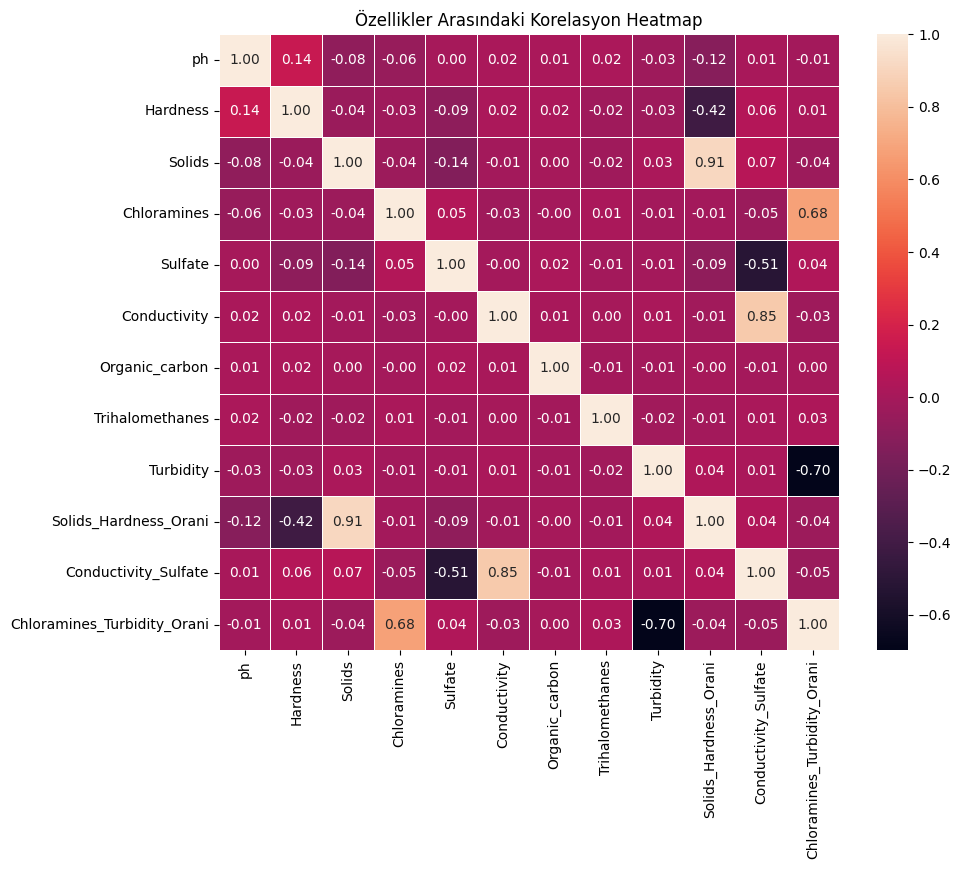

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_korelasyon, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

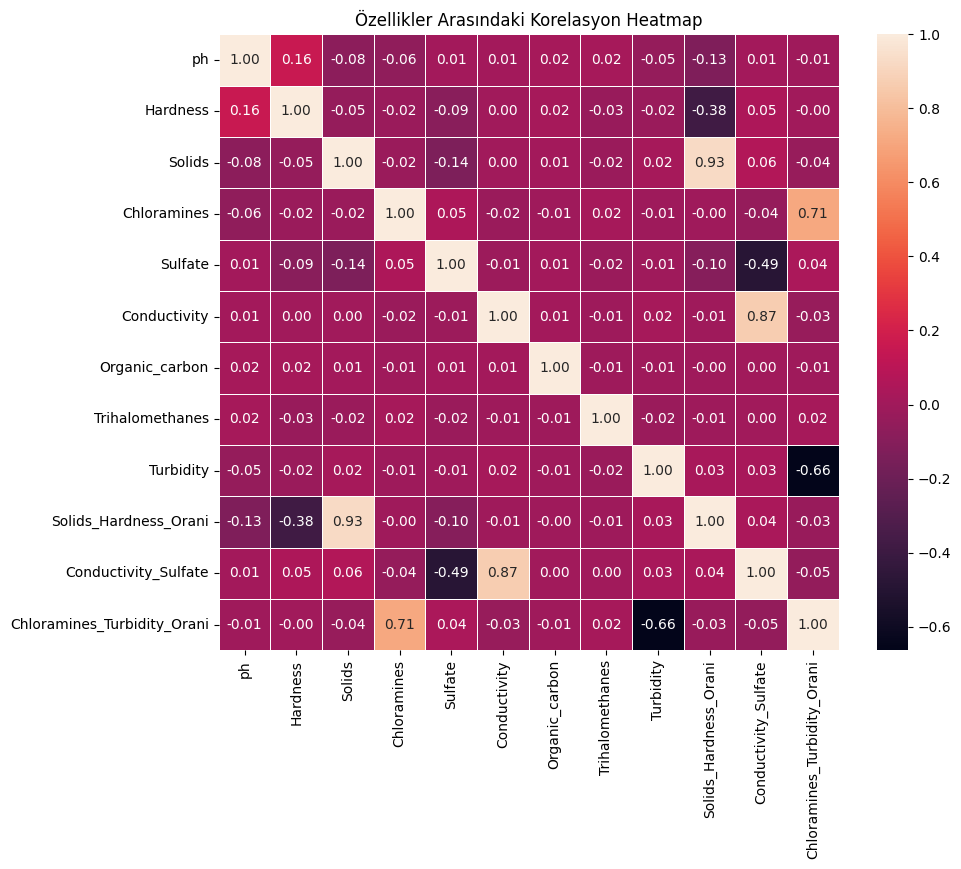

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_korelasyon, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

In [ ]:
x['Potability'] = y

In [ ]:
purple ='#2d023d'
ten = '#ffd4aa'
sns.pairplot(x,
             hue = 'Potability',
             palette= [ten, purple],)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Solids_Hardness_Orani', 'Conductivity_Sulfate',
       'Chloramines_Turbidity_Orani', 'Potability'],
      dtype='object')

In [ ]:
x = x.drop(['Conductivity_Sulfate','Chloramines_Turbidity_Orani','Solids_Hardness_Orani'],axis=1)

In [ ]:
icilebilirx = x[x['Potability'] == 1]

In [ ]:
sns.pairplot(icilebilirx)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

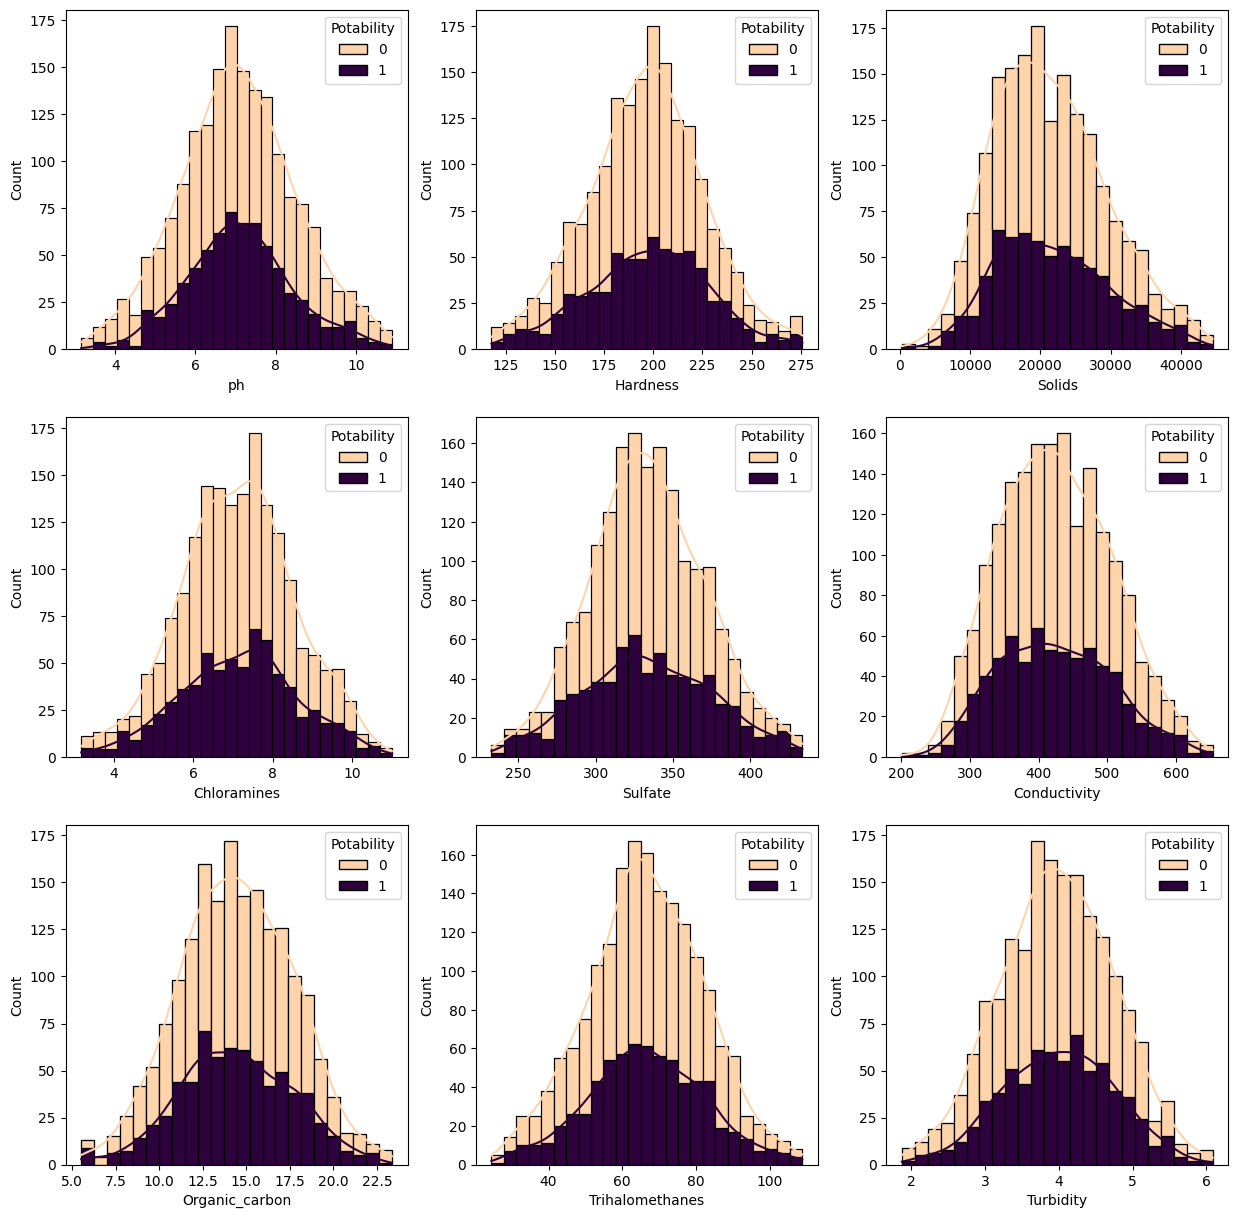

In [ ]:
purple ='#2d023d'
ten = '#ffd4aa'
plotter_dataset = dataset.drop('Potability', axis=1)
plt.figure(figsize = (15, 15))
for i in enumerate(list(dataset.columns[:-1])):
    plt.subplot(3, 3,i[0]+1)
    sns.histplot(
        data = plotter_dataset ,
        x = plotter_dataset[i[1]],
        hue = dataset['Potability'],
        palette= [ten, purple],
        kde = True,
        multiple='stack',
        alpha=1
    )

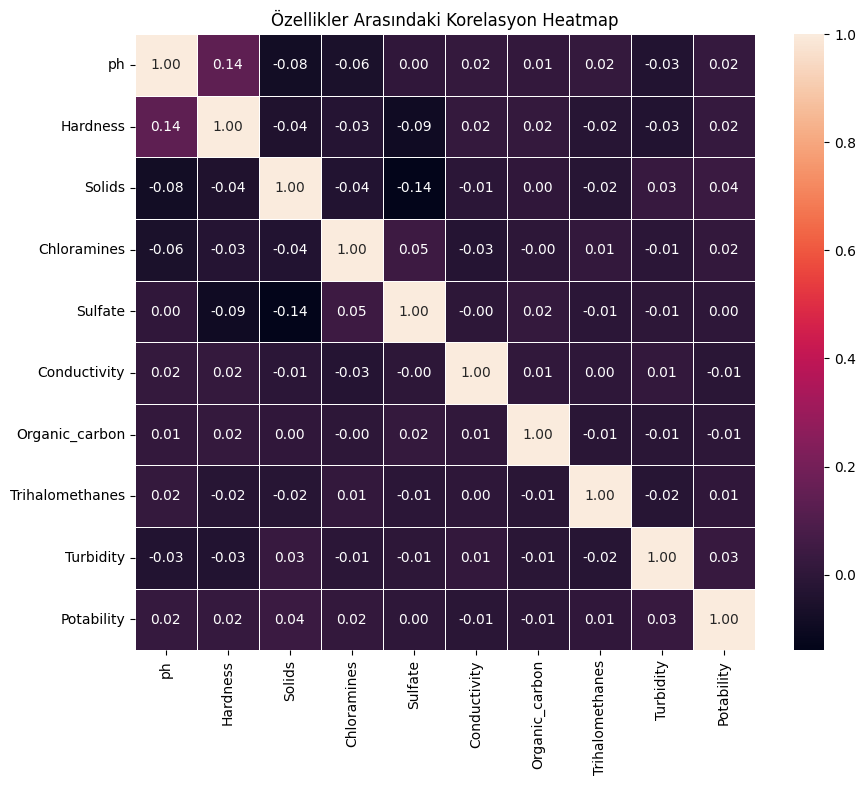

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

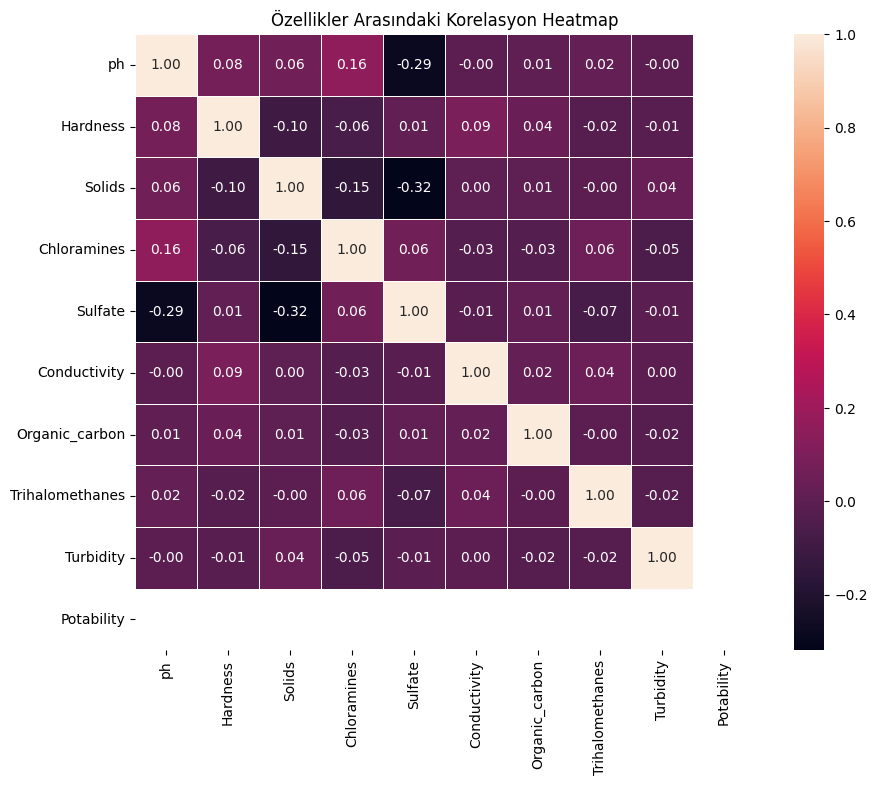

In [ ]:
xicilebilir = x[x['Potability'] == 1]
plt.figure(figsize=(10, 8))
sns.heatmap(xicilebilir.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title('Özellikler Arasındaki Korelasyon Heatmap')
plt.show()

In [ ]:
x = x.drop(['Potability'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                    random_state = 121)
print(x_train.head())

            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
1371  0.746020  0.636906  0.530873     0.413575  0.458989      0.468789   
432   0.559291  0.518415  0.567582     0.227576  0.546558      0.539031   
1625  0.550969  0.541495  0.901500     0.309654  0.119560      0.443885   
2299  0.574671  0.824601  0.323437     0.406119  0.446616      0.163439   
2557  0.693570  0.695734  0.611864     0.574913  0.584066      0.413641   

      Organic_carbon  Trihalomethanes  Turbidity  
1371        0.444457         0.463093   0.782610  
432         0.593654         0.220706   0.754241  
1625        0.196718         0.337855   0.620711  
2299        0.346788         0.833078   0.643262  
2557        0.397492         0.660050   0.646930  


In [ ]:
import numpy as np
parametreler = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=parametreler, cv=5)
rs_rfc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#cm = confusion_matrix(y_test,y_pred)
#acs = accuracy_score(y_test,y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)

In [ ]:
#print(cm,"\n\n",acs,precision,recall,f1)

In [ ]:
parametreler_knc = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(10, 51, 10),
    'p': [1, 2]
}
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
rs_knc = RandomizedSearchCV(estimator=knc, param_distributions=parametreler_knc, cv=5)
rs_knc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': range(10, 51, 10),
                                        'n_neighbors': range(1, 21),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [ ]:
from sklearn.svm import SVC
svc = SVC()
parametrelerf_SVC = {
    'probability': [True, False]
}
rs_svc = RandomizedSearchCV(estimator=svc, param_distributions=parametrelerf_SVC, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rs_svc.fit(x_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'probability': [True, False]},
                   random_state=42, verbose=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
parametrelerf_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [42]
}
rs_dt = RandomizedSearchCV(estimator=dt, param_distributions=parametrelerf_dt, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rs_dt.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 11),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': range(1, 11),
                                        'min_samples_split': range(2, 11),
                                        'random_state': [42],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

0.6564094442143222


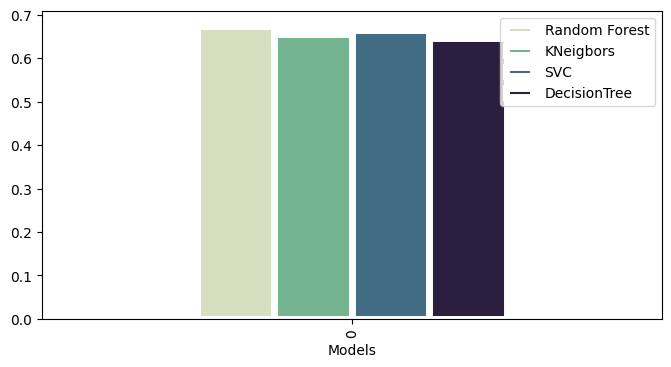

In [ ]:
score_df =  pd.DataFrame({'Random Forest' :  [rs_rfc.best_score_] ,'KNeigbors' : [rs_knc.best_score_], 'SVC' : [rs_svc.best_score_], 'DecisionTree' : [rs_dt.best_score_]})
print(rs_knc.best_score_)
plt.style.use('default')
color_palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
score_df.plot(kind='bar', edgecolor='white', colormap=color_palette, linewidth=5, figsize=(8, 4), xlabel='Models')

plt.show()